# Task 2: Cluster product categories into just 4-6 of them

### Example

Suppose you have reviews for these products:

- Kindle, iPad, Kobo eReader → cluster: **E-Readers/Tablets**

- Wireless Mouse, Keyboard → cluster: **Computer Accessories**

- Blender, Toaster → cluster: **Kitchen Appliances**

### Process: 

Clean text → convert to embeddings → cluster → analyze

### Goal: 
Reduce complexity of product categories to 4–6 meaningful clusters, making it easier to summarize reviews and recommend top products.

### 1. Load and Merge the datasets

In [ ]:
import pandas as pd

file1 = "../data/1429_1.csv"
file2 = "../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"
file3 = "../data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"

# Load your three CSV files
df1 = pd.read_csv(file1, low_memory=False)
df2 = pd.read_csv(file2, low_memory=False)
df3 = pd.read_csv(file3, low_memory=False)

# Combine the datasets of the 3 files
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
print("Combined shape:", df_combined.shape)


Combined shape: (67992, 27)


In [46]:
# Remove dublicates
df_combined.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df_combined.shape)

Shape after removing duplicates: (67897, 27)


In [47]:
# Reset index
df_combined.reset_index(drop=True, inplace=True)

### 2 .Clean code for text-PreProcessing

In [48]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    
    # Join tokens back to string
    return " ".join(tokens)

# Apply cleaning to the 'reviews.text' column of df_combined
df_combined['clean_text'] = df_combined['reviews.text'].apply(clean_text)

# Optional: inspect results
print(df_combined[['reviews.text', 'clean_text']].head())


                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                          clean_text  
0  product far disappointed child love use like a...  
1  great beginner experienced person bought gift ...  
2  inexpensive tablet use learn step nabi thrille...  
3  ive fire hd two week love tablet great valuewe...  
4  bought grand daughter come visit set user ente...  


- Data Inspection

In [49]:
#df_combined.info()

missing_percent = (df_combined.isnull().sum() / len(df_combined) * 100).sort_values(ascending=False)
print("\nMissing values (%):\n", missing_percent.to_string())


Missing values (%):
 reviews.userProvince    100.000000
reviews.userCity        100.000000
reviews.didPurchase      99.985272
reviews.id               99.895430
reviews.dateAdded        63.057278
sourceURLs               51.047911
manufacturerNumber       51.047911
imageURLs                51.047911
primaryCategories        51.047911
dateAdded                51.047911
dateUpdated              51.047911
reviews.doRecommend      18.910998
reviews.numHelpful       18.772553
name                      9.956257
reviews.date              0.057440
reviews.rating            0.048603
reviews.title             0.027984
reviews.username          0.019147
asins                     0.002946
reviews.text              0.001473
id                        0.000000
reviews.sourceURLs        0.000000
reviews.dateSeen          0.000000
manufacturer              0.000000
keys                      0.000000
categories                0.000000
brand                     0.000000
clean_text                0.00000

- Export the cleaned document (to inspect it with external tools)

In [50]:
# Export the cleaned document
import os

output_dir = "../outputs"
output_file = os.path.join(output_dir, "combined_documents_cleaned_sofia.csv")

# Create the folder if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"📁 Created folder: {output_dir}")
else:
    print(f"📁 Folder already exists: {output_dir}")

# Export the DataFrame to CSV
df_combined.to_csv(output_file, index=False)
print(f"✅ DataFrame successfully exported to: {output_file}")


📁 Folder already exists: ../outputs
✅ DataFrame successfully exported to: ../outputs/combined_documents_cleaned_sofia.csv


In [51]:
df_combined['name'].unique()

counts = df_combined['name'].value_counts()
print(counts)

name
Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta                                                                                    10966
AmazonBasics AAA Performance Alkaline Batteries (36 Count)                                                                                                 8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary                                                                             3728
Echo (White),,,\r\nEcho (White),,,                                                                                                                         3309
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,                                                  3176
                                                                                                                                                          ...  
AmazonBasics Nespresso Pod Storage 

In [15]:
df_combined['brand'].unique()

array(['Amazon', 'Amazon Fire', 'Amazon Echo', 'Amazon Coco T',
       'Amazon Fire Tv', 'Amazon Digital Services Inc.', 'Amazonbasics',
       'AmazonBasics'], dtype=object)

In [ ]:
df_combined['primaryCategories'].unique()

array([nan, 'Health & Beauty', 'Electronics', 'Office Supplies',
       'Animals & Pet Supplies', 'Home & Garden', 'Electronics,Furniture',
       'Toys & Games,Electronics', 'Electronics,Media',
       'Office Supplies,Electronics', 'Electronics,Hardware'],
      dtype=object)

In [58]:
num_nans = df_combined['categories'].isna().sum()
print(num_nans)

0


In [19]:
df_combined['categories'].unique()

array(['Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets',
       'eBook Readers,Kindle E-readers,Computers & Tablets,E-Readers & Accessories,E-Readers',
       'Electronics,eBook Readers & Accessories,Covers,Kindle Store,Amazon Device Accessories,Kindle E-Reader Accessories,Kindle (5th Generation) Accessories,Kindle (5th Generation) Covers',
       'Kindle Store,Amazon Devices,Electronics',
       'Tablets,Fire Tablets,Electronics,Computers,Computer Components,Hard Drives & Storage,Computers & Tablets,All Tablets',
       'Tablets,Fire Tablets,Computers & Tablets,All Tablets',
       'Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories',
       'Electronics,iPad & Tablets,All Tablets,Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,E-Readers & Accessories,E-Readers,Used:Computers Accessories,Used:Tablets,Computers,iPads Tablets,Kind

### 3. Clustering

In [59]:
import re
import csv # Needed for quoting | in order to not create an extra column in some readers because of the commas (,)

# Ensure output folder exists
output_folder = "../outputs"
os.makedirs(output_folder, exist_ok=True)

df_cluster = df_combined[['name', 'brand', 'categories']].copy()

df_cluster.fillna('', inplace=True) # Fill NaN with empty strings so concatenation works smoothly

# Light cleaning function for categorical fields
def clean_category(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text

# Apply cleaning
df_cluster['name'] = df_cluster['name'].apply(clean_text)
df_cluster['brand'] = df_cluster['brand'].apply(clean_category)
df_cluster['categories'] = df_cluster['categories'].apply(clean_category)

# Export cleaned dataframe for clustering
# output_file = os.path.join(output_folder, "df_cluster_cleaned_sofia.csv")
# df_cluster.to_csv(output_file, index=False, quoting=csv.QUOTE_ALL)
output_file = os.path.join(output_folder, "df_cluster_cleaned_sofia.tsv")
df_cluster.to_csv(output_file, index=False, sep='\t')  # Tab-separated

print(f"Cleaned clustering dataframe saved to {output_file}")

Cleaned clustering dataframe saved to ../outputs/df_cluster_cleaned_sofia.tsv


In [60]:
df_cluster.tail()

,name,brand,categories
67892,fire tablet alexa display gb magenta special o...,amazon,"tablets,fire tablets,electronics,ipad & tablet..."
67893,fire tablet alexa display gb magenta special o...,amazon,"tablets,fire tablets,electronics,ipad & tablet..."
67894,fire tablet alexa display gb magenta special o...,amazon,"tablets,fire tablets,electronics,ipad & tablet..."
67895,fire tablet alexa display gb magenta special o...,amazon,"tablets,fire tablets,electronics,ipad & tablet..."
67896,fire tablet alexa display gb magenta special o...,amazon,"tablets,fire tablets,electronics,ipad & tablet..."


In [54]:
df_cluster.shape

(67897, 4)

### Experiment 1: K-Means + TF-IDF + Dimensionality Reduction

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

# -----------------------------
# 1. Combine text fields for clustering
# -----------------------------
df_cluster['combined_text'] = (
    df_cluster['name'] + " " +
    df_cluster['brand'] + " " +
    df_cluster['categories']
)

# -----------------------------
# 2. Vectorize text using TF-IDF
# -----------------------------
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,   # limit features for speed
    stop_words='english' # remove common English stopwords
)
X_tfidf = tfidf_vectorizer.fit_transform(df_cluster['combined_text'])

# Optional: Dimensionality reduction for speed
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_tfidf)


# -----------------------------
# 3. Apply KMeans clustering
# -----------------------------
n_clusters = 5  # choose 4-6 depending on your goal
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_cluster['cluster_label'] = kmeans.fit_predict(X_reduced)

# -----------------------------
# 4. Examine top terms per cluster (optional)
# -----------------------------
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\nTop terms per cluster:")
for i in range(n_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {top_terms}")

# -----------------------------
# 5. Export clustered dataframe
# -----------------------------
output_file_clusters = os.path.join(output_folder, "df_cluster_with_labels.tsv")
df_cluster.to_csv(output_file_clusters, index=False, sep='\t')  # Tab-separated

print(f"\n✅ Clustered dataframe saved to {output_file_clusters}")



Top terms per cluster:
Cluster 0: ['1st', '14701001', '15', 'accelerated', 'accessory', 'abis', 'alkaline', '4gb', 'add', '4th']
Cluster 1: ['14701001', '4gb', '4th', 'abis', 'aa', 'adaptive', 'accessories', 'accs', 'alexaenabled', 'available']
Cluster 2: ['2nd', '1st', '14701001', '4gb', '15', 'adaptive', 'accelerated', 'adapter', 'aaa', 'aluminum']
Cluster 3: ['15', '14701001', '4gb', '4th', 'add', 'aaa', 'accessory', 'accessories', 'amazon', 'accelerated']
Cluster 4: ['3g', '14701001', '5th', 'aaa', '1st', '2nd', 'adapters', 'accs', 'adapter', 'adjustable']

✅ Clustered dataframe saved to ../outputs/df_cluster_with_labels.tsv


Results:


Top terms per cluster:

Cluster 0: ['3g', '14701001', '4gb', '4th', 'aaa', 'ability', '2nd', 'absolute', 'accurate', 'accent']

Cluster 1: ['1st', '14701001', '15', 'aa', 'able', '5th', 'absolute', 'ability', 'accidentally', 'ac']

Cluster 2: ['15', '14701001', 'accept', 'accessibility', 'absorbs', 'accessing', 'able', 'accidental', 'absolutely', 'advanced']

Cluster 3: ['14701001', '4th', 'absorbs', '5th', 'accept', 'able', 'abc', 'aaa', 'accident', 'absolutely']

Cluster 4: ['2nd', '1st', '14701001', '15', 'accessed', 'accomplish', 'acquainted', 'accepted', 'accent', 'ability']

----> OMG 😢

#### 🔹 Observations:

- TF-IDF included everything from your combined_text, so product IDs and model numbers dominate because they appear frequently.

- stop_words='english' removes basic English words, but not numbers, product codes, or brand names.

- As a result, clusters don’t represent “Electronics vs. Health & Beauty” or other human-understandable categories.

### Experiment 2: K-Means + TF-IF(high max features) + N-Grams

In [62]:
import os
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# -----------------------------
# 0. Ensure output folder exists
# -----------------------------
output_folder = "../outputs"
os.makedirs(output_folder, exist_ok=True)

# -----------------------------
# 1. Select columns for clustering
# -----------------------------
df_cluster_2 = df_combined[['name', 'brand', 'categories']].copy()
df_cluster_2.fillna('', inplace=True)  # Fill NaN with empty strings

# -----------------------------
# 2. Clean text fields for clustering
# -----------------------------
def clean_category(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_text_for_clustering(text):
    # Lowercase, remove numbers and short tokens
    text = text.lower()
    tokens = text.split()
    tokens = [t for t in tokens if t.isalpha() and len(t) > 2]  # keep only alphabetic words length > 2
    return " ".join(tokens)

# Apply cleaning
df_cluster_2['name'] = df_cluster_2['name'].apply(clean_text_for_clustering)
df_cluster_2['brand'] = df_cluster_2['brand'].apply(clean_category)
df_cluster_2['categories'] = df_cluster_2['categories'].apply(clean_category)

# -----------------------------
# 3. Combine text fields
# -----------------------------
df_cluster_2['combined_text'] = (
    df_cluster_2['name'] + " " +
    df_cluster_2['brand'] + " " +
    df_cluster_2['categories']
)

# -----------------------------
# 4. TF-IDF vectorization
# -----------------------------
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,
    stop_words='english',
    ngram_range=(2,2),
    min_df=2  # ignore extremely rare words
)
X_tfidf = tfidf_vectorizer.fit_transform(df_cluster_2['combined_text'])

# -----------------------------
# 5. KMeans clustering
# -----------------------------
n_clusters = 5  # adjust 4-6 as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_cluster_2['cluster_label'] = kmeans.fit_predict(X_tfidf)

# -----------------------------
# 6. Examine top terms per cluster
# -----------------------------
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("\nTop terms per cluster:")
for i in range(n_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {top_terms}")

# -----------------------------
# 7. Export clustered dataframe
# -----------------------------
output_file_clusters = os.path.join(output_folder, "df_cluster_2_with_labels.tsv")
df_cluster_2.to_csv(output_file_clusters, index=False, sep='\t')

print(f"\n✅ Clustered dataframe saved to {output_file_clusters}")



Top terms per cluster:
Cluster 0: ['tablets tablets', 'special magenta', 'magenta amazon', 'ipad tablets', 'electronics ipad', 'includes special', 'tech toys', 'movies music', 'electronics tech', 'toys movies']
Cluster 1: ['smart home', 'amazon echo', 'home automation', 'smart hubs', 'home home', 'home improvement', 'portable audio', 'wireless speakers', 'voice assistants', 'amazon amazon']
Cluster 2: ['health household', 'health electronics', 'supplies batteries', 'care health', 'camera photo', 'camera batteries', 'camcorder batteries', 'photo batteries', 'health beauty', 'beauty household']
Cluster 3: ['tablets tablets', 'amazon tablets', 'computers tablets', 'tablets computers', 'tablets amazon', 'ebook readers', 'tablets networking', 'tablets ebook', 'offers amazon', 'special offers']
Cluster 4: ['home theater', 'theater streaming', 'tvs home', 'media players', 'streaming media', 'shop ways', 'players tvs', 'entertainment video', 'tv college', 'devices featured']

✅ Clustered data

### Experiment 3: Embedding + KMeans

In [63]:
from sentence_transformers import SentenceTransformer

# -----------------------------
# 1. Generate embeddings
# -----------------------------
model = SentenceTransformer('all-MiniLM-L6-v2')  # small, fast model
embeddings = model.encode(df_cluster_2['combined_text'].tolist(), show_progress_bar=True)

# -----------------------------
# 2. KMeans clustering on embeddings
# -----------------------------
n_clusters = 5  # choose 4-6 as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_cluster_2['cluster_label'] = kmeans.fit_predict(embeddings)

# -----------------------------
# 3. Print some cluster examples
# -----------------------------
for i in range(n_clusters):
    print(f"\nCluster {i} examples:")
    print(df_cluster_2[df_cluster_2['cluster_label']==i]['combined_text'].head(5).tolist())

# -----------------------------
# 4. Export clustered dataframe
# -----------------------------
output_file_clusters = os.path.join(output_folder, "df_cluster_2_embeddings_with_labels.tsv")
df_cluster_2.to_csv(output_file_clusters, index=False, sep='\t')

print(f"\n✅ Clustered dataframe saved to {output_file_clusters}")

Batches: 100%|██████████| 2122/2122 [02:58<00:00, 11.91it/s]



Cluster 0 examples:
['echo echo amazon fire tablets,tablets,computers & tablets,all tablets,computers/tablets & networking,tablets & ebook readers', 'echo echo amazon fire tablets,tablets,computers & tablets,all tablets,computers/tablets & networking,tablets & ebook readers', 'echo echo amazon fire tablets,tablets,computers & tablets,all tablets,computers/tablets & networking,tablets & ebook readers', 'echo echo amazon fire tablets,tablets,computers & tablets,all tablets,computers/tablets & networking,tablets & ebook readers', 'echo echo amazon fire tablets,tablets,computers & tablets,all tablets,computers/tablets & networking,tablets & ebook readers']

Cluster 1 examples:
['kindle oasis with leather charging cover display includes special amazon ebook readers,kindle e-readers,computers & tablets,e-readers & accessories,e-readers', 'kindle oasis with leather charging cover display includes special amazon ebook readers,kindle e-readers,computers & tablets,e-readers & accessories,e-read

### Experiment 4: K-Means - Sentence Embeddings on category column only

In [73]:
# Create a new DataFrame so df_combined remains unchanged
df_clusters = df_combined.copy()

# -----------------------------
# Prepare 'categories' column
# -----------------------------

# Split comma-separated categories into lists
df_clusters['categories_list'] = df_clusters['categories'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)
# Clean spaces
df_clusters['categories_list'] = df_clusters['categories_list'].apply(
    lambda lst: [c.strip() for c in lst]
)

# Join back into string for embedding
df_clusters['categories_str'] = df_clusters['categories_list'].apply(lambda x: ' '.join(x))

# -----------------------------
# Generate embeddings
# -----------------------------

model = SentenceTransformer('all-MiniLM-L6-v2')
category_embeddings = model.encode(df_clusters['categories_str'].tolist(), show_progress_bar=True)

# -----------------------------
# Cluster embeddings
# -----------------------------

k = 5  # number of meta-categories
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(category_embeddings)
df_clusters['category_cluster'] = clusters

# -----------------------------
# Manual renaming of clusters
# -----------------------------
cluster_name_map = {
    0: 'Smart Home / Audio',
    1: 'Fire HD Tablets',
    2: 'Classic Fire Tablets',
    3: 'Batteries',
    4: 'Kindle E-readers'
}

df_clusters['Cluster_Label'] = df_clusters['category_cluster'].map(cluster_name_map)

# -----------------------------
# Analyze clusters
# -----------------------------

# for i in range(k):
#     print(f"\nCluster {i} sample products:")
#     print(df_clusters[df_clusters['category_cluster']==i]['name'].value_counts().head(10))

for i, label in cluster_name_map.items():
    print(f"\nCluster {i} ({label}) sample products:")
    print(df_clusters[df_clusters['category_cluster']==i]['name'].value_counts().head(10))

Batches: 100%|██████████| 2122/2122 [00:43<00:00, 49.31it/s] 



Cluster 0 (Smart Home / Audio) sample products:
name
Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2898
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2527
Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen                                                                                                                                                      845
Amazon Tap Smart Assistant Alexaenabled (black) Brand New                                                                                                                                                            601
Amazon - Echo Plus w/ Built-In Hub - Silver                                   

#### - Plotting

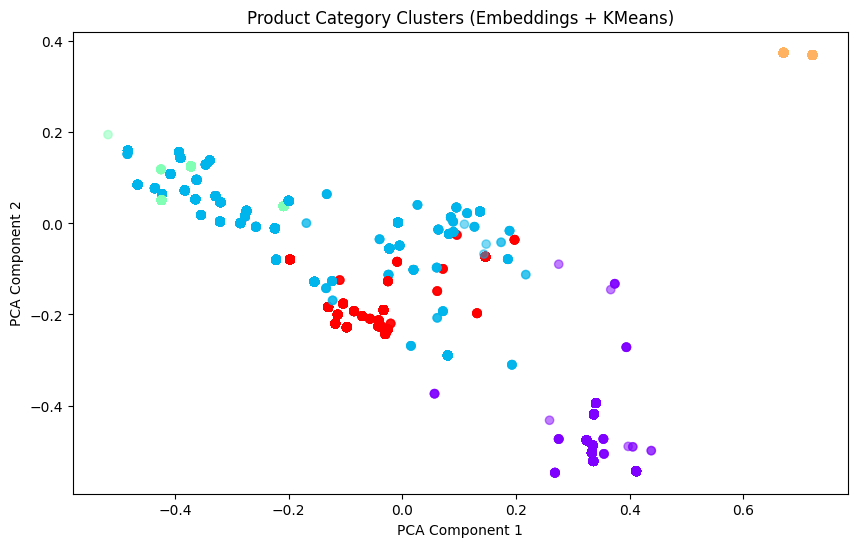

In [74]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -----------------------------
# Visualize clusters
# -----------------------------

pca = PCA(n_components=2)
X_pca = pca.fit_transform(category_embeddings)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='rainbow', alpha=0.5)
plt.title("Product Category Clusters (Embeddings + KMeans)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

- Create Dataframe with the necessary columns:

In [ ]:
# -----------------------------
# Create a new DataFrame with selected columns
# -----------------------------

df_products = df_clusters[['id', 'name', 'categories', 'brand', 'reviews.rating', 'Cluster_Label']].copy()

df_products.rename(columns={
    'id': 'ProductID',
    'name': 'Product Name',
    'categories': 'Category',
    'brand': 'Brand',
    'reviews.rating': 'Ratings',
    'Cluster_Label': 'Cluster'
}, inplace=True)


# Check first rows
print(df_products.head())

# -----------------------------
# Save to CSV
# -----------------------------

output_file = "../outputs/sofia_product_clusters.csv"
df_products.to_csv(output_file, index=False)
print(f"CSV file saved to: {output_file}")


              ProductID                                       Product Name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

                                            Category   Brand  Ratings  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...  Amazon      5.0   
1  Electronics,iPad & Tablets,All Tablets,Fire Ta...  Amazon      5.0   
2  Electronics,iPad & Tablets,All Tablets,Fire Ta...  Amazon      5.0   
3  Electronics,iPad & Tablets,All Tablets,Fire Ta...  Amazon      4.0   
4  Electronics,iPad & Tablets,All Tablets,Fire Ta...  Amazon      5.0   

           Cluster  
0  Fire HD Tablets  
1  Fire HD Tablets  
2  Fire HD Tablets  
3  Fire 